In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('titanic whole dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.groupby('Cabin')['Cabin'].agg('count')

Cabin
A10    1
A11    1
A14    1
A16    1
A18    1
      ..
F33    4
F38    1
F4     4
G6     5
T      1
Name: Cabin, Length: 186, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


as we can see only 295 values of 1309 are not null
and rest all values are null so its better to get rid of that column

we also dont need the name and Passenger Id

In [5]:
df1 = df.drop(['Cabin', 'PassengerId', 'Name'], axis='columns')
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


fair is generally related to the station of boarding and the class of seat so it cannt be a juding factor for survival

In [6]:
df2 = df1.drop(['Fare', 'Ticket'], axis = 'columns')
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>, <AxesSubplot:>]],
      dtype=object)

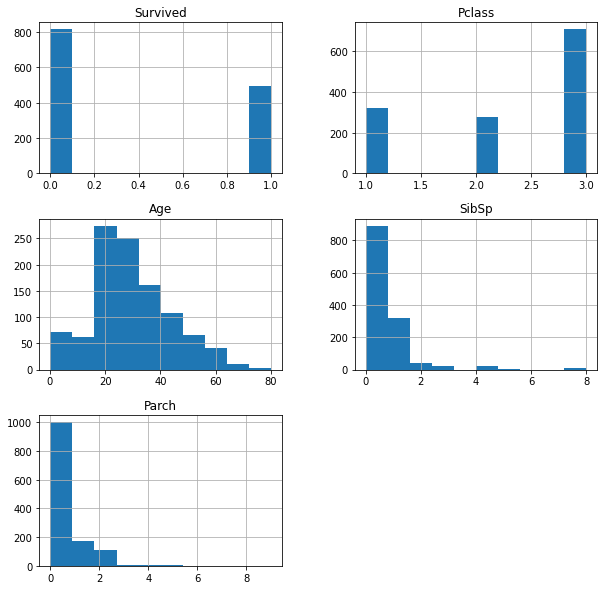

In [7]:
df2.hist(bins = 10, figsize=(10,10))

as computer cannt understand alphabets we need to sex and embarked column to 0 and 1 value only

In [8]:
dummy1 = pd.get_dummies(df2.Sex)
dummy1 = dummy1.drop('male',axis='columns')

In [9]:
dummy2 = pd.get_dummies(df2.Embarked)
dummy2.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [10]:
df3 = pd.concat([df2, dummy1], axis = 'columns').drop('Sex', axis = 'columns')
df3.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,female
0,0,3,22.0,1,0,S,0
1,1,1,38.0,1,0,C,1
2,1,3,26.0,0,0,S,1
3,1,1,35.0,1,0,S,1
4,0,3,35.0,0,0,S,0


In [11]:
df4 = pd.concat([df3, dummy2], axis = 'columns').drop('Embarked', axis = 'columns')
df4.head()

,Survived,Pclass,Age,SibSp,Parch,female,C,Q,S
0,0,3,22.0,1,0,0,0,0,1
1,1,1,38.0,1,0,1,1,0,0
2,1,3,26.0,0,0,1,0,0,1
3,1,1,35.0,1,0,1,0,0,1
4,0,3,35.0,0,0,0,0,0,1


In [12]:
df4.Age.fillna(value=df4.Age.mean(), inplace=True)
df4.head()

,Survived,Pclass,Age,SibSp,Parch,female,C,Q,S
0,0,3,22.0,1,0,0,0,0,1
1,1,1,38.0,1,0,1,1,0,0
2,1,3,26.0,0,0,1,0,0,1
3,1,1,35.0,1,0,1,0,0,1
4,0,3,35.0,0,0,0,0,0,1


In [13]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Age       1309 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   female    1309 non-null   uint8  
 6   C         1309 non-null   uint8  
 7   Q         1309 non-null   uint8  
 8   S         1309 non-null   uint8  
dtypes: float64(1), int64(4), uint8(4)
memory usage: 56.4 KB


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
age = scaler.fit_transform(df4.Age.to_numpy().reshape(-1,1))
scaler1 = StandardScaler()
pclass = scaler.fit_transform(df4.Pclass.to_numpy().reshape(-1,1))

In [15]:
print(age)

[[-0.61197171]
 [ 0.63043107]
 [-0.30137101]
 ...
 [ 0.66925616]
 [ 0.        ]
 [ 0.        ]]


In [16]:
df5 = pd.DataFrame(age,columns=['Age'])
df5.head()

,Age
0,-0.611972
1,0.630431
2,-0.301371
3,0.397481
4,0.397481


In [17]:
df6 = pd.DataFrame(pclass,columns=['pclass'])
df6.head()

,pclass
0,0.841916
1,-1.546098
2,0.841916
3,-1.546098
4,0.841916


In [18]:
df7 = df4.drop(['Age', 'Pclass'], axis = 'columns')
df7.head()

,Survived,SibSp,Parch,female,C,Q,S
0,0,1,0,0,0,0,1
1,1,1,0,1,1,0,0
2,1,0,0,1,0,0,1
3,1,1,0,1,0,0,1
4,0,0,0,0,0,0,1


In [19]:
df8 = pd.concat([df7,df6,df5], axis = 'columns')
df8.head()

,Survived,SibSp,Parch,female,C,Q,S,pclass,Age
0,0,1,0,0,0,0,1,0.841916,-0.611972
1,1,1,0,1,1,0,0,-1.546098,0.630431
2,1,0,0,1,0,0,1,0.841916,-0.301371
3,1,1,0,1,0,0,1,-1.546098,0.397481
4,0,0,0,0,0,0,1,0.841916,0.397481


In [20]:
x = df8.drop('Survived', axis = 'columns')
y = df8.Survived

In [21]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SibSp   1309 non-null   int64  
 1   Parch   1309 non-null   int64  
 2   female  1309 non-null   uint8  
 3   C       1309 non-null   uint8  
 4   Q       1309 non-null   uint8  
 5   S       1309 non-null   uint8  
 6   pclass  1309 non-null   float64
 7   Age     1309 non-null   float64
dtypes: float64(2), int64(2), uint8(4)
memory usage: 46.1 KB


In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.2, random_state = 10)

In [23]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'logistic_regression' : {
            'model': LogisticRegression(),
            'params': {
                'random_state': [0]
            }
        },
        'K neighbour' :{
            'model' : KNeighborsClassifier(),
            'params':{
                'n_neighbors': [2,5,6,7,10],
                'metric':['minkowski'],
                'weights':['uniform','disatance'],
                'p':[1,2]
            }
        },
        'Support Vector Machine':{
            'model':SVC(),
            'params':{
                'kernel':['rbf']
            }
        },
        'Bernoulli':{
            'model':BernoulliNB(),
            'params':{}
        },
        'Gaussian':{
            'model':GaussianNB(),
            'params':{}
        },
        'Decision Tree':{
            'model':DecisionTreeClassifier(),
            'params':{
                'criterion':['gini','entropy'],
                'splitter':['best','random'],
                'random_state':[0]
            }
        }
        
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        print(algo_name)
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

logistic_regression
K neighbour
Support Vector Machine
Bernoulli
Gaussian
Decision Tree


/Users/vivekgoel/miniforge3/envs/jarvis2.0/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/vivekgoel/miniforge3/envs/jarvis2.0/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vivekgoel/miniforge3/envs/jarvis2.0/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 196, in fit
    self.weights = _check_weights(self.weights)
  File "/Users/vivekgoel/miniforge3/envs/jarvis2.0/lib/python3.9/site-

,model,best_score,best_params
0,logistic_regression,0.854198,{'random_state': 0}
1,K neighbour,0.846565,"{'metric': 'minkowski', 'n_neighbors': 10, 'p'..."
2,Support Vector Machine,0.870229,{'kernel': 'rbf'}
3,Bernoulli,0.847328,{}
4,Gaussian,0.835115,{}
5,Decision Tree,0.837405,"{'criterion': 'entropy', 'random_state': 0, 's..."


as we can see Support Vector Classifier yeilds the best result so i am going to train a model based on SVC

In [25]:
model = SVC(kernel = 'rbf')
model.fit(x_train, y_train)

SVC()

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model.predict(x_test))

[[149  11]
 [ 20  82]]


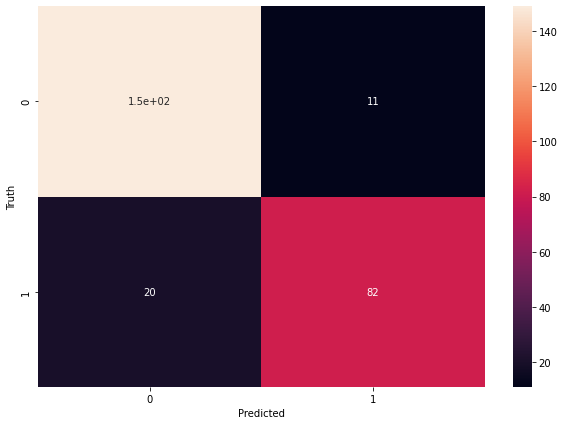

In [27]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
print(cm)